# Script for data augmentation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Rotor-0'),
  Text(1, 0, 'Noload'),
  Text(2, 0, 'A&C&B10'),
  Text(3, 0, 'A&C10'),
  Text(4, 0, 'Fan')])

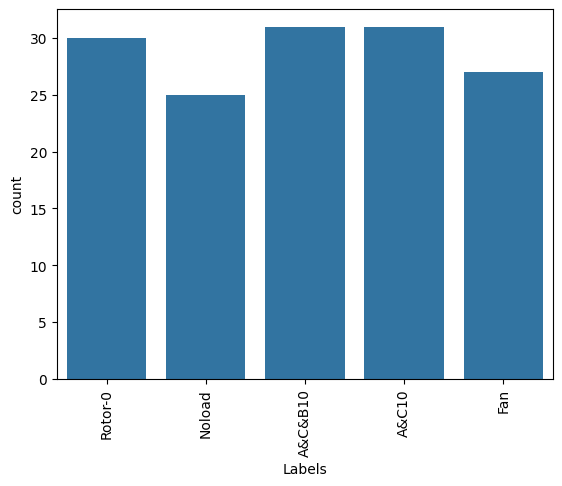

In [3]:
df = pd.read_csv("entropy_signals2.csv")
labels = pd.read_csv("labels2.csv")
sns.countplot(labels, x="Labels")
plt.xticks(rotation=90)

In [4]:
max_class, max_value = labels.value_counts().idxmax()[0], labels.value_counts().max()
values = labels.value_counts().index.to_list()
columns = []
for value in values:
    columns.append(value[0])
values = labels.value_counts()
(columns)

['A&C&B10', 'A&C10', 'Rotor-0', 'Fan', 'Noload']

In [5]:
new_labels = []
new_signals = []
for column in columns:
    if(column == max_class):
        continue
    else:
        data = np.abs(values.loc[column].values - max_value)
        mask = (labels["Labels"] == column)
        signals_values = df[mask]
        for _ in range(data[0]):
            random_samples = np.random.random_sample((5,))
            choice = np.random.choice(len(signals_values))
            signal = signals_values.iloc[choice,:].values
            choice = np.random.choice(len(random_samples))
            random_sample = random_samples[choice]
            signal = signal + np.random.normal(0, random_sample, len(signal))
            new_signals.append(signal)
            new_labels.append(column)

/tmp/ipykernel_13286/1548311620.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signals_values = df[mask]
/tmp/ipykernel_13286/1548311620.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signals_values = df[mask]
/tmp/ipykernel_13286/1548311620.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signals_values = df[mask]
/tmp/ipykernel_13286/1548311620.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signals_values = df[mask]


In [6]:
new_signals = np.array(new_signals)
new_labels = np.array(new_labels)
values = df.to_numpy()
new_signals = np.concatenate((values, new_signals), axis=0)
new_labels = pd.DataFrame(new_labels, columns=["Labels"])
df = pd.DataFrame(new_signals)
labels = pd.concat([labels, new_labels])

<Axes: xlabel='Labels'>

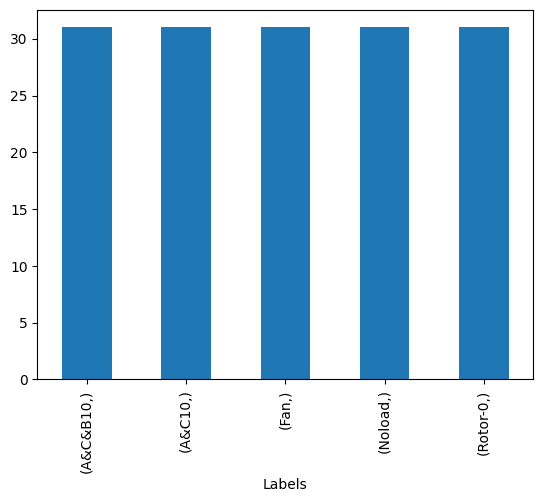

In [7]:
df.to_csv("entropy_stratified2.csv", index=False, header=False)
labels.to_csv("labels_stratified2.csv", index=False)
labels.value_counts().plot(kind="bar")